# Bad Betas

Tasks: 

- find those beta pairs causing bumps behavior
- for complete hypergraphs only

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp
import pickle

import sys
sys.path.append('../tests/')
from test_solving_KEs_complete import *

In [2]:
"""Complete case test."""
# setup
# TODO: increase these values
N = 100
I0 = 10 
time_max = 20

beta1 = 2 / N       # pairwise infection rate
beta2 = 4 / (N**2)  # hyperedge contagion rate
mu    = 1           # recovery rate

print(f"Setup: \n")
print(f"\tH = Complete Hypergraph, N = {N}, I0 = {I0}\n")
print(f"\tbeta1 = {beta1}, beta2 = {beta2}, mu = {mu}\n")

Setup: 

	H = Complete Hypergraph, N = 100, I0 = 10

	beta1 = 0.02, beta2 = 0.0004, mu = 1



In [3]:
i_max = 10
j_max = 10

k_star = np.zeros((i_max, j_max)) # to store the values k^* = E[X(t_max)]

eps = 1e-1 # shift for esp to not start with 0 !

beta1_vec = (np.array(list(range(i_max))) + eps) / N
beta2_vec = (np.array(list(range(j_max))) + eps) / (N**2)

print(f"beta2: {beta1_vec[:5]}, ..., {beta1_vec[-3:-1]}")
print(f"beta2: {beta2_vec[:5]}, ..., {beta1_vec[-3:-1]}")

beta2: [0.001 0.011 0.021 0.031 0.041], ..., [0.071 0.081]
beta2: [1.0e-05 1.1e-04 2.1e-04 3.1e-04 4.1e-04], ..., [0.071 0.081]


In [4]:
M = N + 1 # number of all states

# set the initial condition
p0 = np.zeros(M)
p0[I0] = 1.0 # all other states have prob 0 at time 0
print(f"p0 = {p0[:20]} ...")

# time range and times to evaluate solution
nsteps = 101
t_span = (0.0, time_max)
t_eval = np.linspace(t_span[0], t_span[1], nsteps)

p0 = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] ...


In [ ]:
solve_for_betas = False
# save solutions to run it once
file_path = '../results/solutions_stationary_state.pickle'

if solve_for_betas:
    solutions = {}
    for i, beta1 in enumerate(beta1_vec):
        for j, beta2 in enumerate(beta2_vec):
            ode_system_complete = list_all_ODEs_complete(N, beta1, beta2, mu)

            def f_ode(t, p):
                return ode_system_complete(t, p)

            sol = solve_ivp(f_ode, 
                            t_span, 
                            p0, 
                            t_eval=t_eval,
                            method="RK45"
            )
            solutions[str((i, j))] = sol
    # save the solutions
    with open(file_path, "wb") as f:
        pickle.dump(solutions, f)    
else:
    # load solutions
    with open(file_path, "rb") as f:
        solutions_stationary_state = pickle.load(f)    
    

In [9]:
# solutions_stationary_state = solutions.copy()
# solutions_stationary_state

In [10]:
# plot expected values of p_{k}(t) over time t
# if slope < -eps, color it 
plt.figure()
sol = solutions_stationary_state[str((i, j))]
expected_values = calculate_expected_values(sol)

step_diff = int(nsteps / 5)
point_a = (sol.t[nsteps - step_diff], expected_values[nsteps - step_diff])
point_b = (sol.t[-1], expected_values[-1])

finite_diff = (point_b[1] - point_a[1]) / step_diff
if finite_diff < -eps:
    plt.plot(point_a[0], point_a[1], 'ro')
    plt.plot(point_b[0], point_b[1], 'ro')
    plt.plot(sol.t, expected_values, color="red")

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.show()

TypeError: calculate_expected_values() missing 1 required positional argument: 'ntimes'

<Figure size 640x480 with 0 Axes>

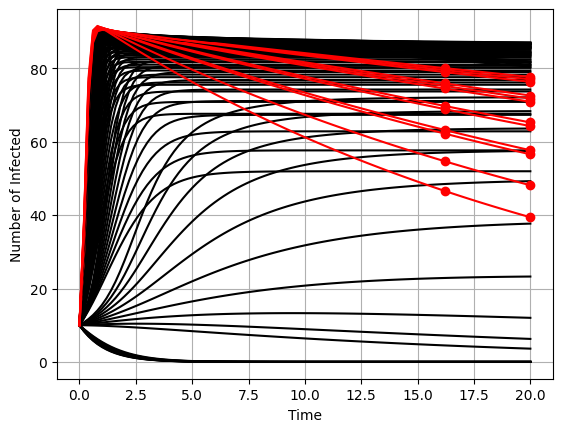

In [ ]:
# plot expected values of p_{k}(t) over time t
# if slope < -eps, color it 
# save the bad (beta1, beta2) pair
bad_betas = []
bad_indices = []

plt.figure()
for i, beta1 in enumerate(beta1_vec):
    for j, beta2 in enumerate(beta2_vec):
        sol = solutions_stationary_state[str((i, j))]
        expected_values = calculate_expected_values(sol)
                
        # if slope < -eps, color it 
        # save the bad (beta1, beta2) pair        
        step_diff = int(nsteps / 5)
        point_a = (sol.t[nsteps - step_diff], expected_values[nsteps - step_diff])
        point_b = (sol.t[-1], expected_values[-1])

        finite_diff = (point_b[1] - point_a[1]) / step_diff
        if finite_diff < -eps:
            bad_betas.append((beta1, beta2))
            bad_indices.append((i, j))
            plt.plot(point_a[0], point_a[1], 'ro')
            plt.plot(point_b[0], point_b[1], 'ro')
            plt.plot(sol.t, expected_values, color="red")
        else:
            plt.plot(sol.t, expected_values, color="k")

        # k_star[i, j] = expected_values[-1]

plt.xlabel("Time")
plt.ylabel("Number of Infected")
# plt.legend() # no legend
plt.grid(True)
plt.savefig("../figures/solutions-kolmogorov/complete/bad-betas.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
bad_betas, len(bad_betas)

([(np.float64(0.071), np.float64(0.00081)),
  (np.float64(0.071), np.float64(0.00091)),
  (np.float64(0.081), np.float64(0.00061)),
  (np.float64(0.081), np.float64(0.0007099999999999999)),
  (np.float64(0.081), np.float64(0.00081)),
  (np.float64(0.081), np.float64(0.00091)),
  (np.float64(0.091), np.float64(0.00041)),
  (np.float64(0.091), np.float64(0.0005099999999999999)),
  (np.float64(0.091), np.float64(0.00061)),
  (np.float64(0.091), np.float64(0.0007099999999999999)),
  (np.float64(0.091), np.float64(0.00081)),
  (np.float64(0.091), np.float64(0.00091))],
 12)

In [ ]:
bad_indices

[(7, 8),
 (7, 9),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

When solving KEs for these bad betas in Mathematica directly as

```mathematica
MatrixExp[matrixQ t] . p0;
```

gives:

```mathematica
Inverse::luc: Result for Inverse of badly conditioned matrix
```

Numerically with `NDSolve`.

Switching to method:

`Method -> "ExplicitRungeKutta"`

gives:

```mathematica
Running with current pair (beta1, beta2) = 0.001, 0.00001
NDSolveValue::ndstf: At t == 1.62519, system appears to be stiff. Methods Automatic, BDF, or StiffnessSwitching may be more appropriate.
Done
Running with current pair (beta1, beta2) = 0.001, 0.00011
NDSolveValue::ndstf: At t == 0.951014, system appears to be stiff. Methods Automatic, BDF, or StiffnessSwitching may be more appropriate.
Done
Running with current pair (beta1, beta2) = 0.001, 0.00021
NDSolveValue::ndstf: At t == 0.707566, system appears to be stiff. Methods Automatic, BDF, or StiffnessSwitching may be more appropriate.
General::stop: Further output of NDSolveValue::ndstf will be suppressed during this calculation.

```